In [ ]:
import os
import numpy as np
import sys
import matplotlib
# matplotlib.use('TkAgg')
import matplotlib.pyplot as plt


In [ ]:

log_dir = os.path.join(os.path.dirname(os.path.dirname(os.getcwd())), 'results' + os.sep)
env_base = '..'+os.sep+'environments'+os.sep
names = [folder for folder in next(os.walk(log_dir))[1]]

metric = 'queue'
output_file = 'avg_{}.py'.format(metric)
run_avg = dict()


In [11]:
names

['IDQN-tr0-cologne8-0-drq_norm-wait_norm',
 'IDQN-tr0-cologne3-0-drq_norm-wait_norm',
 'MAXPRESSURE-tr0-cologne8-0-mplight-wait',
 'STOCHASTIC-tr0-cologne8-0-mplight-wait']

In [12]:

for name in names:
    split_name = name.split('-')
    print(split_name)
    map_name = split_name[2]
    average_per_episode = []
    for i in range(1, 10000):
        trip_file_name = log_dir+name + os.sep + 'metrics_'+str(i)+'.csv'
        if not os.path.exists(trip_file_name):
            print('No '+trip_file_name)
            break

        num_steps, total = 0, 0.0
        last_departure_time = 0
        last_depart_id = ''
        with open(trip_file_name) as fp:
            reward, wait, steps = 0, 0, 0
            for line in fp:
                line = line.split('}')
                queues = line[2]
                signals = queues.split(':')
                step_total = 0
                for s, signal in enumerate(signals):
                    if s == 0: continue
                    queue = signal.split(',')
                    queue = int(queue[0])
                    step_total += queue
                step_avg = step_total / len(signals)
                total += step_avg
                num_steps += 1

        average = total / num_steps
        average_per_episode.append(average)

    run_name = split_name[0]+' '+split_name[2]+' '+split_name[3]+' '+split_name[4]+' '+split_name[5]
    average_per_episode = np.asarray(average_per_episode)

    if run_name in run_avg:
        run_avg[run_name].append(average_per_episode)
    else:
        run_avg[run_name] = [average_per_episode]

alg_res = []
alg_name = []
for run_name in run_avg:
    list_runs = run_avg[run_name]
    min_len = min([len(run) for run in list_runs])
    list_runs = [run[:min_len] for run in list_runs]
    avg_delays = np.sum(list_runs, 0)/len(list_runs)
    err = np.std(list_runs, axis=0)

    alg_name.append(run_name)
    alg_res.append(avg_delays)

    alg_name.append(run_name+'_yerr')
    alg_res.append(err)

    plt.title(run_name)
    plt.plot(avg_delays)
    plt.show()


np.set_printoptions(threshold=sys.maxsize)
with open(output_file, 'a') as out:
    for i, res in enumerate(alg_res):
        out.write("'{}': {},\n".format(alg_name[i], res.tolist()))


['IDQN', 'tr0', 'cologne8', '0', 'drq_norm', 'wait_norm']
No /home/mansour/project/Traffic_signal_control/RESCO/results/IDQN-tr0-cologne8-0-drq_norm-wait_norm/metrics_101.csv
['IDQN', 'tr0', 'cologne3', '0', 'drq_norm', 'wait_norm']
No /home/mansour/project/Traffic_signal_control/RESCO/results/IDQN-tr0-cologne3-0-drq_norm-wait_norm/metrics_101.csv
['MAXPRESSURE', 'tr0', 'cologne8', '0', 'mplight', 'wait']
No /home/mansour/project/Traffic_signal_control/RESCO/results/MAXPRESSURE-tr0-cologne8-0-mplight-wait/metrics_101.csv
['STOCHASTIC', 'tr0', 'cologne8', '0', 'mplight', 'wait']
No /home/mansour/project/Traffic_signal_control/RESCO/results/STOCHASTIC-tr0-cologne8-0-mplight-wait/metrics_100.csv


In [9]:
output_file

'avg_queue.py'

In [14]:
map_configs = {
    'grid4x4': {
        'lights': [],
        'net': 'environments/grid4x4/grid4x4.net.xml',
        'route': 'environments/grid4x4/grid4x4',
        'step_length': 10,
        'yellow_length': 3,
        'step_ratio': 1,
        'start_time': 0,
        'end_time': 3600,
        'warmup': 0
    },
    'arterial4x4': {
        'lights': [],
        'net': 'environments/arterial4x4/arterial4x4.net.xml',
        'route': 'environments/arterial4x4/arterial4x4',
        'step_length': 5,
        'yellow_length': 2,
        'step_ratio': 1,
        'start_time': 0,
        'end_time': 3600,
        'warmup': 0
    },
    'arterial5x5': {
        'lights': [],
        'net': 'environments/arterial5x5/exp.sumocfg',
        'route': None,
        'step_length': 5,
        'yellow_length': 2,
        'step_ratio': 1,
        'start_time': 0,
        'end_time': 3600,
        'warmup': 0
    },
    'ingolstadt1': {
        'lights': [],
        'net': 'environments/ingolstadt1/ingolstadt1.sumocfg',
        'route': None,
        'step_length': 10,
        'yellow_length': 3,
        'step_ratio': 1,
        'start_time': 57600,
        'end_time': 61200,
        'warmup': 0
    },
    'ingolstadt7': {
        'lights': ['cluster_1757124350_1757124352',
                   'gneJ143', 'gneJ207',
                   'cluster_306484187_cluster_1200363791_1200363826_1200363834_1200363898_1200363927_1200363938_1200363947_1200364074_1200364103_1507566554_1507566556_255882157_306484190',
                   '32564122', 'gneJ260', 'gneJ210'
                   ],
        'net': 'environments/ingolstadt7/ingolstadt7.sumocfg',
        'route': None,
        'step_length': 10,
        'yellow_length': 3,
        'step_ratio': 1,
        'start_time': 57600,
        'end_time': 61200,
        'warmup': 0
    },
    'ingolstadt21': {
        'lights': ['1863241632', '2330725114', '243351999', '243641585', '243749571', '30503246', '30624898', '32564122', '89127267', '89173763', '89173808', 'cluster_1427494838_273472399', 'cluster_1757124350_1757124352', 'cluster_1863241547_1863241548_1976170214', 'cluster_306484187_cluster_1200363791_1200363826_1200363834_1200363898_1200363927_1200363938_1200363947_1200364074_1200364103_1507566554_1507566556_255882157_306484190', 'gneJ143', 'gneJ207', 'gneJ208', 'gneJ210', 'gneJ255', 'gneJ257'],
        'net': 'environments/ingolstadt21/ingolstadt21.sumocfg',
        'route': None,
        'step_length': 10,
        'yellow_length': 3,
        'step_ratio': 1,
        'start_time': 57600,
        'end_time': 61200,
        'warmup': 0
    },
    'cologne1': {
        'lights': [],
        'net': 'environments/cologne1/cologne1.sumocfg',
        'route': None,
        'step_length': 10,
        'yellow_length': 3,
        'step_ratio': 1,
        'start_time': 25200,
        'end_time': 28800,
        'warmup': 0
    },
    'cologne3': {
        'lights': [],
        'net': 'environments/cologne3/cologne3.sumocfg',
        'route': None,
        'step_length': 10,
        'yellow_length': 3,
        'step_ratio': 1,
        'start_time': 25200,
        'end_time': 28800,
        'warmup': 0
    },
    'cologne8': {
        'lights': [],
        'net': 'environments/cologne8/cologne8.sumocfg',
        'route': None,
        'step_length': 10,
        'yellow_length': 3,
        'step_ratio': 1,
        'start_time': 25200,
        'end_time': 28800,
        'warmup': 0
    },
    'turin5': {
        'lights': [],
        'net': 'environments/turin5/turin5.sumocfg',
        'route': None,
        'step_length': 10,
        'yellow_length': 3,
        'step_ratio': 1,
        'start_time': 65400,
        'end_time': 69000,
        'warmup': 0
    },
}


In [15]:
import os
import xml.etree.ElementTree as ET

import numpy as np
import sys
import matplotlib
# matplotlib.use('TkAgg')
import matplotlib.pyplot as plt


log_dir = os.path.join(os.path.dirname(os.path.dirname(os.getcwd())), 'results' + os.sep)
env_base = '..'+os.sep+'environments'+os.sep
names = [folder for folder in next(os.walk(log_dir))[1]]

metrics = ['timeLoss', 'duration', 'waitingTime']


In [16]:


for metric in metrics:
    output_file = 'avg_{}.py'.format(metric)
    run_avg = dict()

    for name in names:
        split_name = name.split('-')
        print(split_name)
        map_name = split_name[2]
        average_per_episode = []
        for i in range(1, 10000):
            trip_file_name = log_dir+name + os.sep + 'tripinfo_'+str(i)+'.xml'
            if not os.path.exists(trip_file_name):
                print('No '+trip_file_name)
                break
            try:
                tree = ET.parse(trip_file_name)
                root = tree.getroot()
                num_trips, total = 0, 0.0
                last_departure_time = 0
                last_depart_id = ''
                for child in root:
                    try:
                        num_trips += 1
                        total += float(child.attrib[metric])
                        if metric == 'timeLoss':
                            total += float(child.attrib['departDelay'])
                            depart_time = float(child.attrib['depart'])
                            if depart_time > last_departure_time:
                                last_departure_time = depart_time
                                last_depart_id = child.attrib['id']
                    except Exception as e:
                        #raise e
                        break
                route_file_name = env_base + map_name + os.sep + map_name + '_' + str(i) + '.rou.xml'

                if metric == 'timeLoss':    # Calc. departure delays
                    try:
                        tree = ET.parse(route_file_name)
                    except FileNotFoundError:
                        route_file_name = env_base + map_name + os.sep + map_name + '.rou.xml'
                        tree = ET.parse(route_file_name)
                    root = tree.getroot()
                    last_departure_time = None
                    for child in root:
                        if child.attrib['id'] == last_depart_id:
                            last_departure_time = float(child.attrib['depart'])     # Get the time it was suppose to depart
                    never_departed = []
                    if last_departure_time is None: raise Exception('Wrong trip file')
                    for child in root:
                        if child.tag != 'vehicle': continue
                        depart_time = float(child.attrib['depart'])
                        if depart_time > last_departure_time:
                            never_departed.append(depart_time)
                    never_departed = np.asarray(never_departed)
                    never_departed_delay = np.sum(float(map_configs[map_name]['end_time']) - never_departed)
                    total += never_departed_delay
                    num_trips += len(never_departed)

                average = total / num_trips
                average_per_episode.append(average)
            except ET.ParseError as e:
                #raise e
                break

        run_name = split_name[0]+' '+split_name[2]+' '+split_name[3]+' '+split_name[4]+' '+split_name[5]
        average_per_episode = np.asarray(average_per_episode)

        if run_name in run_avg:
            run_avg[run_name].append(average_per_episode)
        else:
            run_avg[run_name] = [average_per_episode]


    alg_res = []
    alg_name = []
    for run_name in run_avg:
        list_runs = run_avg[run_name]
        min_len = min([len(run) for run in list_runs])
        list_runs = [run[:min_len] for run in list_runs]
        avg_delays = np.sum(list_runs, 0)/len(list_runs)
        err = np.std(list_runs, axis=0)

        alg_name.append(run_name)
        alg_res.append(avg_delays)

        alg_name.append(run_name+'_yerr')
        alg_res.append(err)

        plt.title(run_name)
        plt.plot(avg_delays)
        plt.show()


    np.set_printoptions(threshold=sys.maxsize)
    with open(output_file, 'a') as out:
        for i, res in enumerate(alg_res):
            out.write("'{}': {},\n".format(alg_name[i], res.tolist()))


['IDQN', 'tr0', 'cologne8', '0', 'drq_norm', 'wait_norm']
No /home/mansour/project/Traffic_signal_control/RESCO/results/IDQN-tr0-cologne8-0-drq_norm-wait_norm/tripinfo_101.xml
['IDQN', 'tr0', 'cologne3', '0', 'drq_norm', 'wait_norm']
No /home/mansour/project/Traffic_signal_control/RESCO/results/IDQN-tr0-cologne3-0-drq_norm-wait_norm/tripinfo_101.xml
['MAXPRESSURE', 'tr0', 'cologne8', '0', 'mplight', 'wait']
No /home/mansour/project/Traffic_signal_control/RESCO/results/MAXPRESSURE-tr0-cologne8-0-mplight-wait/tripinfo_101.xml
['STOCHASTIC', 'tr0', 'cologne8', '0', 'mplight', 'wait']
No /home/mansour/project/Traffic_signal_control/RESCO/results/STOCHASTIC-tr0-cologne8-0-mplight-wait/tripinfo_101.xml
['IDQN', 'tr0', 'cologne8', '0', 'drq_norm', 'wait_norm']
No /home/mansour/project/Traffic_signal_control/RESCO/results/IDQN-tr0-cologne8-0-drq_norm-wait_norm/tripinfo_101.xml
['IDQN', 'tr0', 'cologne3', '0', 'drq_norm', 'wait_norm']
No /home/mansour/project/Traffic_signal_control/RESCO/result


 Avg. Delay

Cologne Region
IDQN 21.46 +- 0.0
Max Pressure 39.73
Random 108.59


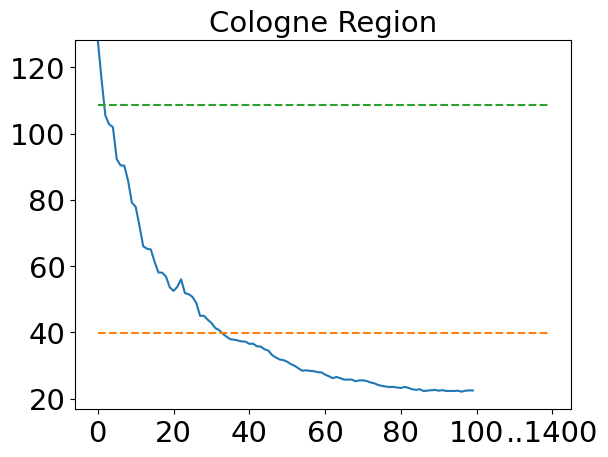


 Avg. Trip Time

Cologne Region
IDQN 85.29 +- 0.0
Max Pressure 104.13
Random 173.78


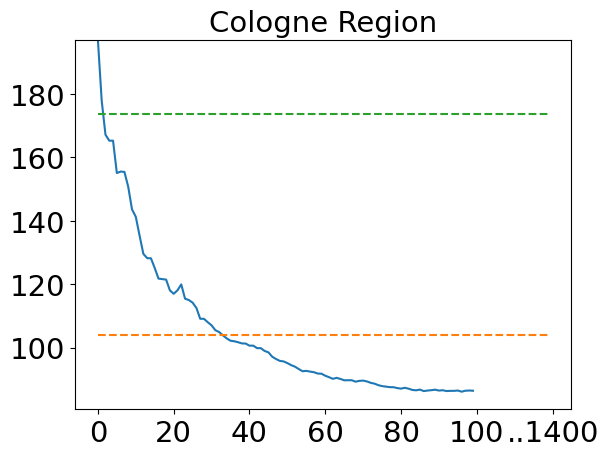


 Avg. Wait

Cologne Region
IDQN 5.36 +- 0.0
Max Pressure 19.81
Random 66.77


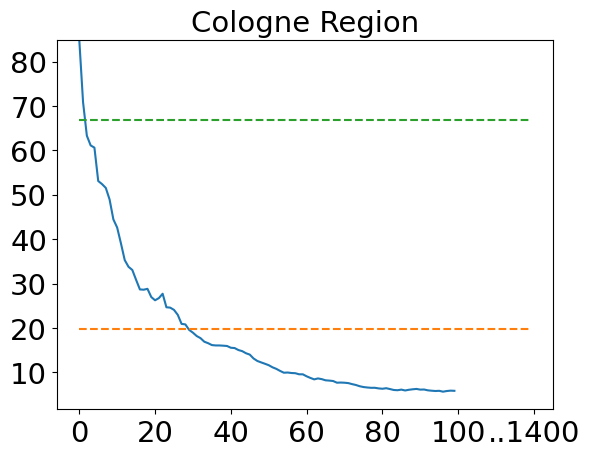


 Avg. Queue

Cologne Region
IDQN 0.34 +- 0.0
Max Pressure 1.05
Random 0.03


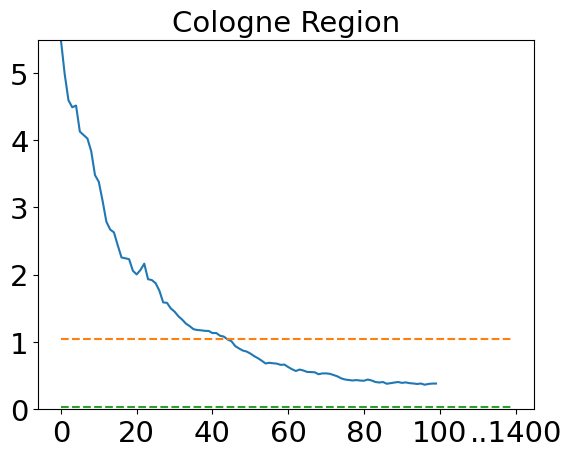

IDQN
Avg. Delay  &  21.46 \\
Avg. Trip Time  &  85.29 \\
Avg. Wait  &  5.36 \\
Avg. Queue  &  0.34 \\
IPPO
Avg. Delay  &   \\
Avg. Trip Time  &   \\
Avg. Wait  &   \\
Avg. Queue  &   \\
MPLight
Avg. Delay  &   \\
Avg. Trip Time  &   \\
Avg. Wait  &   \\
Avg. Queue  &   \\
FMA2C
Avg. Delay  &   \\
Avg. Trip Time  &   \\
Avg. Wait  &   \\
Avg. Queue  &   \\
Full State MPLight
Avg. Delay  &   \\
Avg. Trip Time  &   \\
Avg. Wait  &   \\
Avg. Queue  &   \\


In [2]:
import matplotlib.pyplot as plt
import numpy as np
from collections import deque

from avg_timeLoss import delays
from avg_duration import durations
from avg_waitingTime import waiting
from avg_queue import queue

map_title = {
    # 'grid4x4': '4x4 Grid',
    # 'arterial4x4': '4x4 Avenues',
    # 'ingolstadt1': 'Ingolstadt Single Signal',
    # 'ingolstadt7': 'Ingolstadt Corridor',
    # 'ingolstadt21': 'Ingolstadt Region',
    # 'cologne1': 'Cologne Single Signal',
    # 'cologne3': 'Cologne Corridor',
    'cologne8': 'Cologne Region'
}

alg_name = {
    'FIXED': 'Fixed Time',
    'STOCHASTIC': 'Random',
    'MAXWAVE': 'Greedy',
    'MAXPRESSURE': 'Max Pressure',
    'FULLMAXPRESSURE': 'Max Pressure w/ All phases',
    'IDQN': 'IDQN',
    'MPLight': 'MPLight',
    'MPLightFULL': 'Full State MPLight',
    'FMA2C': 'FMA2C',
    'IPPO': 'IPPO'
}

statics = ['MAXPRESSURE', 'STOCHASTIC', 'MAXWAVE', 'FIXED']

num_n = -1
num_episodes = 120
fs = 21
window_size = 5

metrics = [delays, durations, waiting, queue]
metrics_str = ['Avg. Delay', 'Avg. Trip Time', 'Avg. Wait', 'Avg. Queue']

chart = {
    'IDQN': {
        'Avg. Delay': [],
        'Avg. Wait': [],
        'Avg. Queue': [],
        'Avg. Trip Time': []
    },
    'IPPO': {
        'Avg. Delay': [],
        'Avg. Wait': [],
        'Avg. Queue': [],
        'Avg. Trip Time': []
    },
    'MPLight': {
        'Avg. Delay': [],
        'Avg. Wait': [],
        'Avg. Queue': [],
        'Avg. Trip Time': []
    },
    'FMA2C': {
        'Avg. Delay': [],
        'Avg. Wait': [],
        'Avg. Queue': [],
        'Avg. Trip Time': []
    },
    'Full State MPLight': {
        'Avg. Delay': [],
        'Avg. Wait': [],
        'Avg. Queue': [],
        'Avg. Trip Time': []
    },
}

for met_i, metric in enumerate(metrics):
    print('\n', metrics_str[met_i])
    for map in map_title.keys():
        print()
        print(map_title[map])
        dqn_max = 0
        plt.gca().set_prop_cycle(None)
        for key in metric:
            if map in key and '_yerr' not in key:
                alg = key.split(' ')[0]
                key_map = key.split(' ')[1]

                if alg == 'IDQN': dqn_max = np.max(metric[key])     # Set ylim to DQN max, it's approx. random perf.

                if len(metric[key]) == 0:   # Fixed time isn't applicable to valid. scenario, skip color for consistency
                    plt.plot([], [])
                    plt.fill_between([], [], [])
                    continue

                # Print out performance metric
                err = metric.get(key + '_yerr')
                if num_n == -1:
                    last_n_ind = np.argmin(metric[key])
                    last_n = metric[key][last_n_ind]
                else:
                    last_n_ind = np.argmin(metric[key][-num_n:])
                    last_n = metric[key][-num_n:][last_n_ind]
                last_n_err = 0 if err is None else err[last_n_ind]
                avg_tot = np.mean(metric[key])
                avg_tot = np.round(avg_tot, 2)
                last_n = np.round(last_n, 2)
                last_n_err = np.round(last_n_err, 2)

                #last_n = np.round(np.mean(err), 2) if err is not None else 0
                #last_n = last_n_ind

                # Print stats
                if alg in statics:
                    print('{} {}'.format(alg_name[alg], avg_tot))
                    do_nothing = 0
                else:
                    print('{} {} +- {}'.format(alg_name[alg], last_n, last_n_err))
                    if not(map == 'grid4x4' or map == 'arterial4x4'):
                        chart[alg_name[alg]][metrics_str[met_i]].append(str(last_n)) #+' $\pm$ '+str(last_n_err)

                # Build plots
                if alg in statics:
                    plt.plot([avg_tot]*num_episodes, '--', label=alg_name[alg])
                    plt.fill_between([], [], [])      # Advance color cycle
                elif not('FMA2C' in alg or 'IPPO' in alg):
                    windowed = []
                    queue = deque(maxlen=window_size)
                    std_q = deque(maxlen=window_size)

                    windowed_yerr = []
                    x = []
                    for i, eps in enumerate(metric[key]):
                        x.append(i)
                        queue.append(eps)
                        windowed.append(np.mean(queue))
                        if err is not None:
                            std_q.append(err[i])
                            windowed_yerr.append(np.mean(std_q))

                    windowed = np.asarray(windowed)
                    if err is not None:
                        windowed_yerr = np.asarray(windowed_yerr)
                        low = windowed - windowed_yerr
                        high = windowed + windowed_yerr
                    else:
                        low = windowed
                        high = windowed

                    plt.plot(windowed, label=alg_name[alg])
                    plt.fill_between(x, low, high, alpha=0.4)
                else:
                    if alg == 'FMA2C':  # Skip pink in color cycle
                        plt.plot([], [])
                        plt.fill_between([], [], [])
                    alg = key.split(' ')[0]
                    x = [num_episodes-1, num_episodes]
                    y = [last_n]*2
                    plt.plot(x, y, label=alg_name[alg])
                    plt.fill_between([], [], [])  # Advance color cycle

        points = np.asarray([0, 20, 40, 60, 80, 100, num_episodes])
        labels = ('0', '20', '40', '60', '80', '100', '..1400')
        plt.yticks(fontsize=fs)
        plt.xticks(points, labels, fontsize=fs)
        #plt.xlabel('Episode', fontsize=32)
        #plt.ylabel('Delay (s)', fontsize=32)
        plt.title(map_title[map], fontsize=fs)
        #plt.legend(prop={'size': 25})
        bot, top = plt.ylim()
        if bot < 0: bot = 0
        plt.ylim(bot, dqn_max)
        plt.savefig(f'{map}_{metrics_str[met_i]}.png')
        plt.show()

for alg in chart:
    print(alg)
    for met in metrics_str:
        print(met, ' & ', ' & '.join(chart[alg][met]), '\\\\')
